In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import torch
torch.__version__

'2.5.1+cu121'

In [3]:
# Load MNIST data
from torchvision import datasets, transforms
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.95MB/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [4]:
print(mnist_train)
x_train = mnist_train.data
y_train = mnist_train.targets
x_test = mnist_test.data
y_test = mnist_test.targets

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
print(x_train.dtype)
print(x_train.shape)

torch.uint8
torch.Size([60000, 28, 28])


In [6]:
x_train[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [7]:
y_train

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
# prepare data
x_train = x_train.type(torch.float32)
x_test = x_test.type(torch.float32)
x_train /= 255
x_test /= 255

tensor(5)


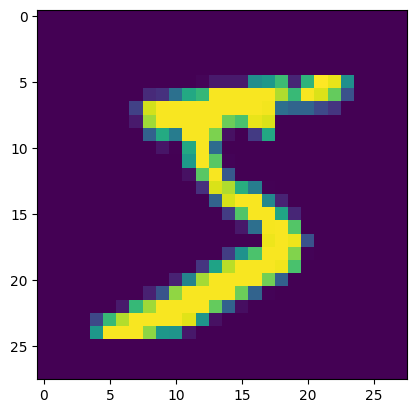

In [9]:
plt.imshow(x_train[0])
print(y_train[0])

In [10]:
# zmiana wymiarów - dodanie koloru
x_train = x_train.reshape(-1, 1, 28, 28)
x_test = x_test.reshape(-1, 1, 28, 28)
print(x_train.shape)

torch.Size([60000, 1, 28, 28])


# Simple neural networks

In [11]:
import torch.nn as nn

In [12]:
# multinomial logistic regression
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 10),  # softmax included in loss function
                    )

In [13]:
net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [14]:
list(net.children()) # iterator over layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=10, bias=True)]

In [15]:
dict(net.named_children())

{'0': Flatten(start_dim=1, end_dim=-1),
 '1': Linear(in_features=784, out_features=10, bias=True)}

In [16]:
from torchsummary import summary
summary(net, (1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [17]:
# trainable parametes
list(net.parameters())

[Parameter containing:
 tensor([[-0.0334,  0.0110,  0.0340,  ..., -0.0051, -0.0183,  0.0280],
         [ 0.0078,  0.0169,  0.0173,  ...,  0.0248, -0.0011, -0.0202],
         [-0.0219,  0.0205, -0.0242,  ...,  0.0325,  0.0170,  0.0301],
         ...,
         [-0.0121,  0.0184,  0.0150,  ...,  0.0329,  0.0203,  0.0297],
         [-0.0242,  0.0041, -0.0168,  ...,  0.0151,  0.0356, -0.0194],
         [-0.0143,  0.0068, -0.0219,  ...,  0.0046,  0.0195, -0.0266]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0315,  0.0081,  0.0074, -0.0161,  0.0256,  0.0160, -0.0013, -0.0130,
         -0.0346, -0.0304], requires_grad=True)]

In [18]:
list(net.named_parameters())

[('1.weight',
  Parameter containing:
  tensor([[-0.0334,  0.0110,  0.0340,  ..., -0.0051, -0.0183,  0.0280],
          [ 0.0078,  0.0169,  0.0173,  ...,  0.0248, -0.0011, -0.0202],
          [-0.0219,  0.0205, -0.0242,  ...,  0.0325,  0.0170,  0.0301],
          ...,
          [-0.0121,  0.0184,  0.0150,  ...,  0.0329,  0.0203,  0.0297],
          [-0.0242,  0.0041, -0.0168,  ...,  0.0151,  0.0356, -0.0194],
          [-0.0143,  0.0068, -0.0219,  ...,  0.0046,  0.0195, -0.0266]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0315,  0.0081,  0.0074, -0.0161,  0.0256,  0.0160, -0.0013, -0.0130,
          -0.0346, -0.0304], requires_grad=True))]

# move to GPU

In [19]:
print(x_train.is_cuda)
next(net.parameters()).is_cuda

False


False

In [20]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [21]:
# need to move EVERYTHING to the right device
net.to(device)
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# training loop

In [73]:
# training loop
import torch.optim as optim
import tqdm.notebook

def fit(net, X_train=x_train, y_train=y_train, X_valid=x_test,
        y_valid=y_test, epochs=5, batch_size=128):
  if torch.cuda.is_available():
    device = "cuda"
    torch.cuda.empty_cache()
  else:
    device = "cpu"
  net = net.to(device)
  X_train = X_train.to(device)
  y_train = y_train.to(device)
  if X_valid is not None:
    X_valid = X_valid.to(device)
    y_valid = y_valid.to(device)
  summary(net, (1, 28, 28), device=device)

  optimizer = optim.Adam(net.parameters())
  ###! optimizer = optim.SGD(net.parameters())
  epochs = epochs
  batch_size = batch_size
  loss = torch.nn.CrossEntropyLoss()  # includes softmax
  N = X_train.shape[0]
  for e in range(epochs):
      # shuffle
      idx = torch.randperm(X_train.shape[0])
      X_train = X_train[idx]
      y_train = y_train[idx]

      i = 0
      # split into mini batches
      # torch.utils.data.DataLoader does this automatically
      pbar = tqdm.notebook.tqdm(total=(N+batch_size-1)//batch_size)
      while i < N:
          optimizer.zero_grad() #!!!
          j = min(N, i + batch_size)
          X_batch = X_train[i:j]
          y_batch = y_train[i:j]
          i = j
          pred = net(X_batch)
          l = loss(pred, y_batch)
          l.backward()
          optimizer.step()
          pbar.update(1)
      pbar.close()
      if X_valid is not None:
        with torch.no_grad():
          net.eval()
          pred = net(X_valid)
          predicted = pred.argmax(axis=1)
          print("epoch", e, "val accur", (1.0*(predicted==y_valid)).mean().item())
          net.train()

In [23]:
fit(net, x_train, y_train, x_test, y_test)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9027999639511108


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9150999784469604


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9172999858856201


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9223999977111816


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9221999645233154


In [24]:
print(y_train[:2])
print(net(x_train[0:2]))

tensor([5, 0], device='cuda:0')
tensor([[ -1.4994,  -5.8538,  -1.7002,   3.2796,  -7.9139,   4.1596,  -4.4674,
          -0.2711,  -1.9187,  -2.3717],
        [  8.8361, -11.4417,  -1.5278,  -2.1269,  -7.8686,   0.7027,  -3.0631,
          -2.8477,  -1.2741,  -2.8295]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


# larger networks

In [25]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128),
                    nn.Sigmoid(),
                    nn.Linear(128, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
           Sigmoid-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9143999814987183


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9337999820709229


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9440000057220459


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9521999955177307


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9559999704360962


In [26]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.932699978351593


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.950499951839447


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9625999927520752


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9667999744415283


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9714999794960022


In [27]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128),
                    nn.GELU(),
                    nn.Linear(128, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              GELU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9292999505996704


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9520999789237976


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9643999934196472


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9675999879837036


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9710999727249146


In [28]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128), nn.ReLU(),
                    nn.Linear(128, 64), nn.ReLU(),
                    nn.Linear(64, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9401999711990356


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9601999521255493


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9648000001907349


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9686999917030334


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9702000021934509


In [29]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128), nn.ReLU(),
                    nn.Linear(128, 128), nn.ReLU(),
                    nn.Linear(128, 64), nn.ReLU(),
                    nn.Linear(64, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
              ReLU-5                  [-1, 128]               0
            Linear-6                   [-1, 64]           8,256
              ReLU-7                   [-1, 64]               0
            Linear-8                   [-1, 10]             650
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.48
Estimated Total Size (MB): 0.49
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9465999603271484


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9584999680519104


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9651999473571777


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9705999493598938


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9716999530792236


# Regularization

In [30]:
# L1/L2 regul must be computed by hand

In [31]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128),
                    nn.ReLU(),
                    nn.Dropout(0.25),
                    nn.Linear(128, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9294999837875366


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9429000020027161


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.952299952507019


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9569999575614929


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9611999988555908


In [32]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128), nn.ReLU(),
                    nn.Dropout(0.25),
                    nn.Linear(128, 128), nn.ReLU(),
                    nn.Dropout(0.25),
                    nn.Linear(128, 64), nn.ReLU(),
                    nn.Dropout(0.25),
                    nn.Linear(64, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                  [-1, 128]          16,512
              ReLU-6                  [-1, 128]               0
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
              ReLU-9                   [-1, 64]               0
          Dropout-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9253000020980835


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9426999688148499


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9541999697685242


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9617999792098999


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9624999761581421


In [33]:
# Batch normalization

In [34]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128),
                    nn.ReLU(),
                    nn.BatchNorm1d(128),
                    nn.Linear(128, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
       BatchNorm1d-4                  [-1, 128]             256
            Linear-5                   [-1, 10]           1,290
Total params: 102,026
Trainable params: 102,026
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9633999466896057


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9699999690055847


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.973800003528595


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9769999980926514


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9787999987602234


In [35]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 128), nn.ReLU(),
                    nn.BatchNorm1d(128),
                    nn.Linear(128, 128), nn.ReLU(),
                    nn.BatchNorm1d(128),
                    nn.Linear(128, 64), nn.ReLU(),
                    nn.BatchNorm1d(64),
                    nn.Linear(64, 10),  # softmax included in loss function
                    )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
       BatchNorm1d-4                  [-1, 128]             256
            Linear-5                  [-1, 128]          16,512
              ReLU-6                  [-1, 128]               0
       BatchNorm1d-7                  [-1, 128]             256
            Linear-8                   [-1, 64]           8,256
              ReLU-9                   [-1, 64]               0
      BatchNorm1d-10                   [-1, 64]             128
           Linear-11                   [-1, 10]             650
Total params: 126,538
Trainable params: 126,538
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9639999866485596


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9753999710083008


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9770999550819397


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9758999943733215


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9781999588012695


# Convolutional layers

In [36]:
net = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(26*26*16, 10),  # softmax included in loss function
  )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
           Flatten-3                [-1, 10816]               0
            Linear-4                   [-1, 10]         108,170
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.25
Params size (MB): 0.41
Estimated Total Size (MB): 0.66
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9583999514579773


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9709999561309814


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9784999489784241


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9799000024795532


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9802999496459961


In [37]:
net = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3),
    nn.ReLU(),
    nn.Flatten(),
    nn.Dropout(0.25),
    nn.Linear(24*24*32, 128),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(128, 10),
  )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,640
              ReLU-4           [-1, 32, 24, 24]               0
           Flatten-5                [-1, 18432]               0
           Dropout-6                [-1, 18432]               0
            Linear-7                  [-1, 128]       2,359,424
              ReLU-8                  [-1, 128]               0
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 2,365,514
Trainable params: 2,365,514
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.73
Params size (MB): 9.02
Estimat

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9745000004768372


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.983299970626831


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9817999601364136


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9837999939918518


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9843999743461609


In [38]:
layers = list(net.children())
layers

[Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1)),
 ReLU(),
 Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1)),
 ReLU(),
 Flatten(start_dim=1, end_dim=-1),
 Dropout(p=0.25, inplace=False),
 Linear(in_features=18432, out_features=128, bias=True),
 ReLU(),
 Dropout(p=0.25, inplace=False),
 Linear(in_features=128, out_features=10, bias=True)]

In [39]:
print(layers[0].weight.shape)
print(layers[0].bias.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])


tensor([[ 0.0850,  0.1195,  0.4601],
        [ 0.2124, -0.0895,  0.1695],
        [-0.3708, -0.2370, -0.2572]], device='cuda:0',
       grad_fn=<SliceBackward0>)


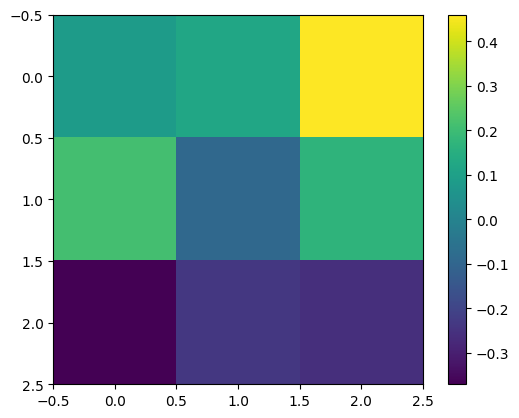

In [40]:
print(layers[0].weight[0,0,:,:]) # filter 0
plt.imshow(layers[0].weight[0,0,:,:].detach().cpu())
plt.colorbar()

tensor([[-0.1979, -0.2362,  0.3258],
        [-0.2987,  0.3081,  0.1447],
        [ 0.0470, -0.0341,  0.2981]], device='cuda:0',
       grad_fn=<SliceBackward0>)


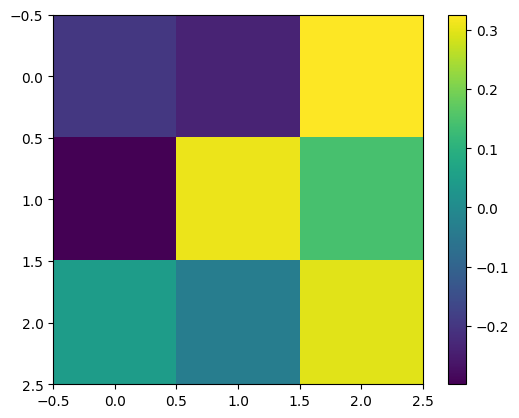

In [41]:
print(layers[0].weight[1,0,:,:]) # filter 1
plt.imshow(layers[0].weight[1,0,:,:].detach().cpu())
plt.colorbar()

tensor([[ 0.4204,  0.2317,  0.2076],
        [ 0.2622, -0.2988, -0.0278],
        [-0.0981,  0.0809, -0.2861]], device='cuda:0',
       grad_fn=<SliceBackward0>)


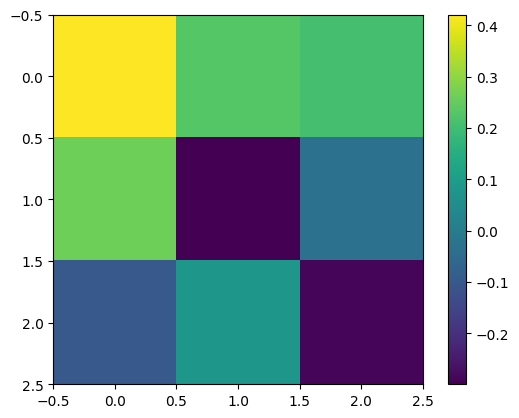

In [42]:
print(layers[0].weight[2,0,:,:]) # filter 2
plt.imshow(layers[0].weight[2,0,:,:].detach().cpu())
plt.colorbar()

In [43]:
print(layers[0](x_train[0:1]).shape)
layers[0](x_train[0:1])

torch.Size([1, 16, 26, 26])


tensor([[[[-0.0814, -0.0814, -0.0814,  ..., -0.0814, -0.0814, -0.0814],
          [-0.0814, -0.0814, -0.0814,  ..., -0.0814, -0.0814, -0.0814],
          [-0.0814, -0.0814, -0.0814,  ..., -0.0814, -0.0814, -0.0814],
          ...,
          [-0.0814, -0.0814,  0.1082,  ..., -0.0814, -0.0814, -0.0814],
          [-0.0814, -0.0814,  0.1640,  ..., -0.0814, -0.0814, -0.0814],
          [-0.0814, -0.0814, -0.0814,  ..., -0.0814, -0.0814, -0.0814]],

         [[-0.0055, -0.0055, -0.0055,  ..., -0.0055, -0.0055, -0.0055],
          [-0.0055, -0.0055, -0.0055,  ..., -0.0055, -0.0055, -0.0055],
          [-0.0055, -0.0055, -0.0055,  ..., -0.0055, -0.0055, -0.0055],
          ...,
          [-0.0055, -0.0055,  0.1419,  ..., -0.0055, -0.0055, -0.0055],
          [-0.0055, -0.0055,  0.1682,  ..., -0.0055, -0.0055, -0.0055],
          [-0.0055, -0.0055, -0.0055,  ..., -0.0055, -0.0055, -0.0055]],

         [[ 0.0674,  0.0674,  0.0674,  ...,  0.0674,  0.0674,  0.0674],
          [ 0.0674,  0.0674,  

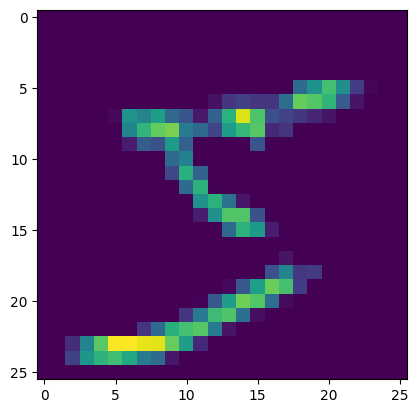

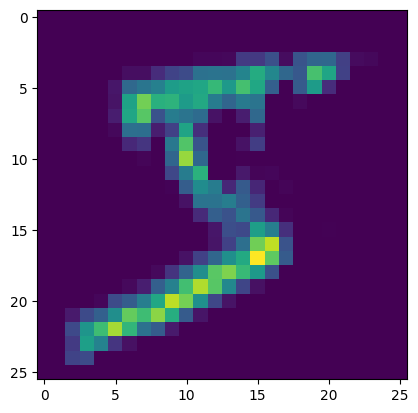

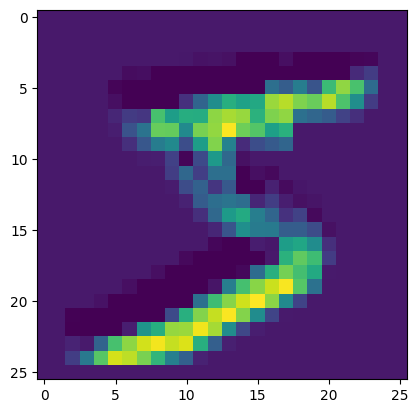

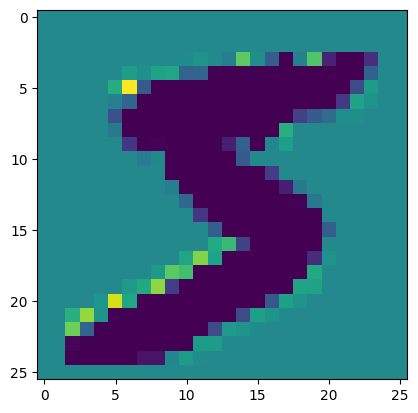

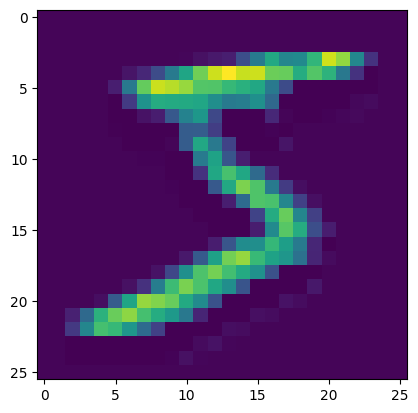

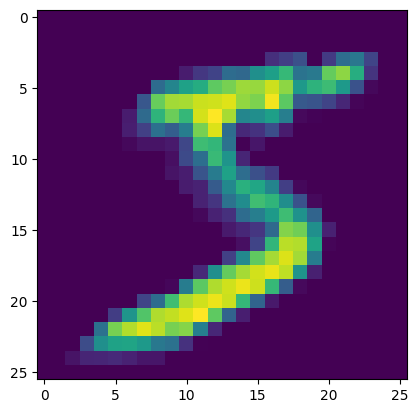

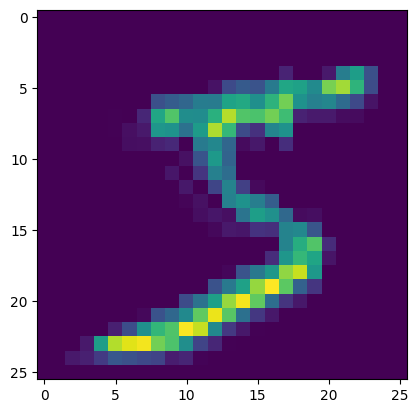

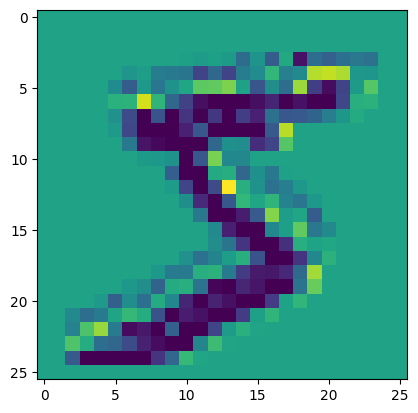

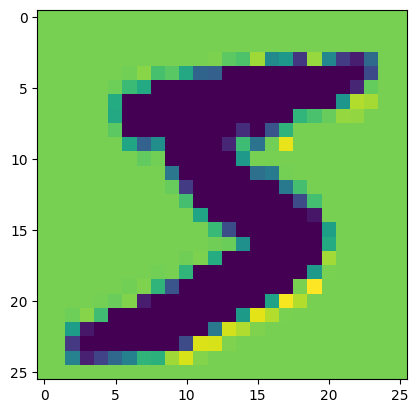

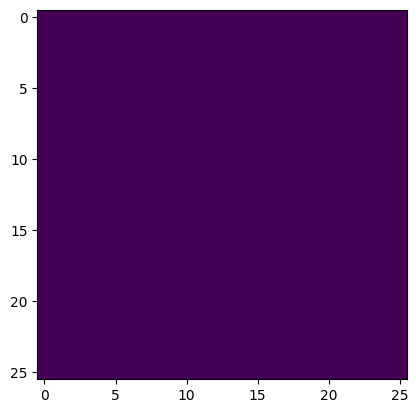

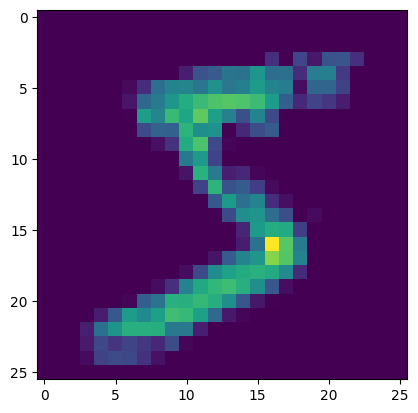

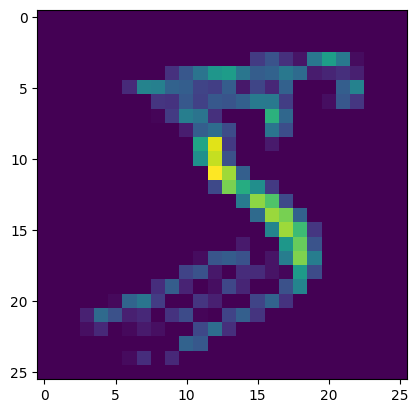

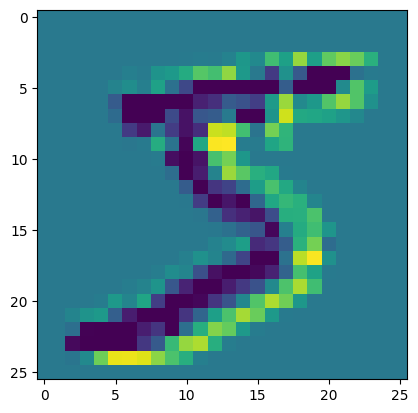

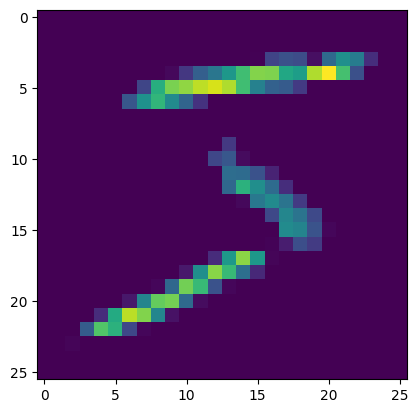

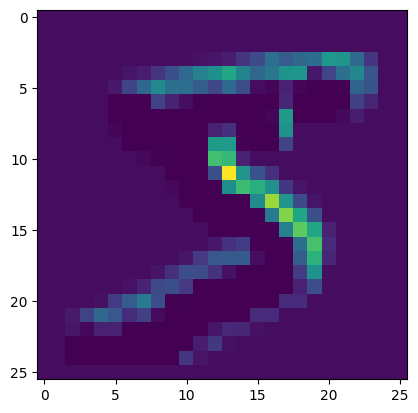

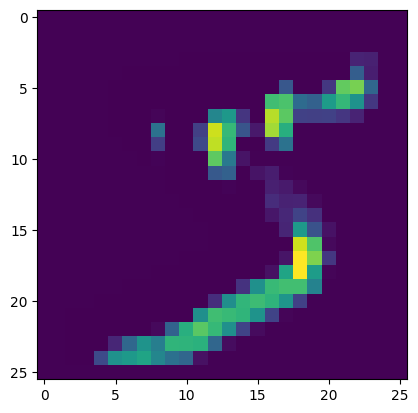

In [44]:
# outputs of first layer filters
tr_img = layers[0](x_train[0:1])
tr_img = layers[1](tr_img) # ReLU
tr_img = tr_img.detach().cpu().numpy()
for ch in range(16):
  plt.figure()
  plt.imshow(tr_img[0,ch,:,:])

<ipython-input-45-1af9d13a57b0>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


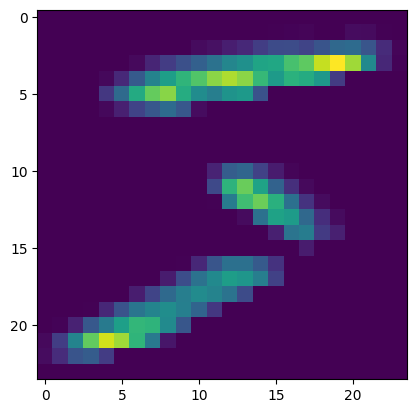

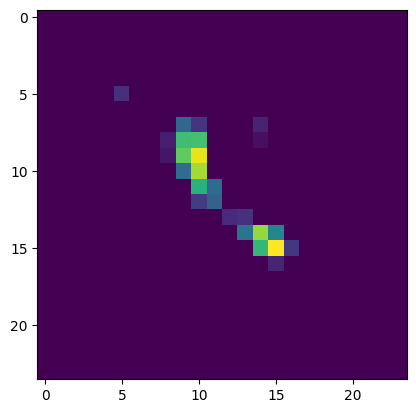

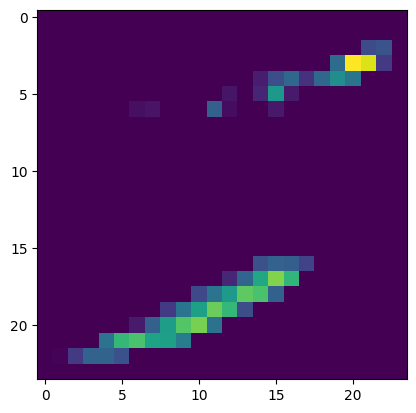

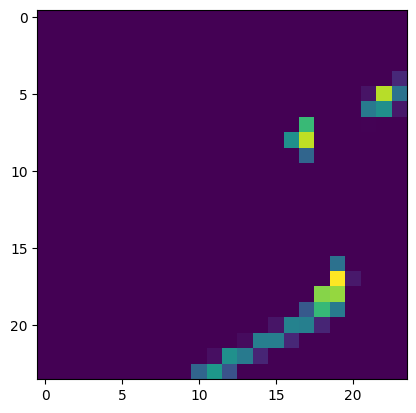

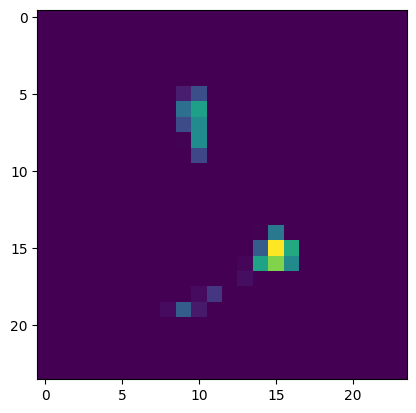

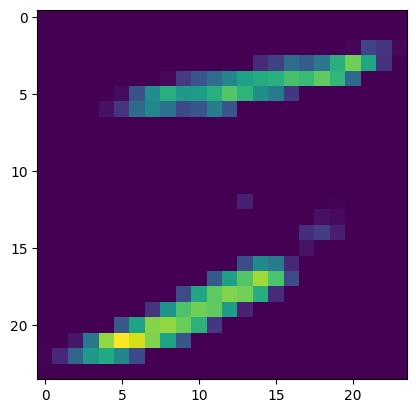

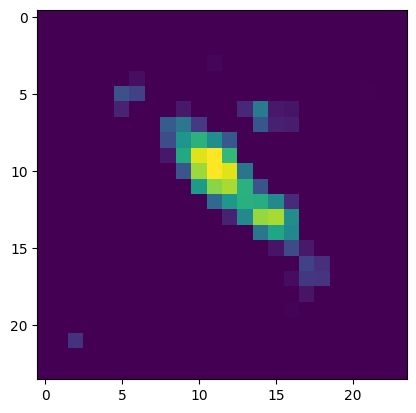

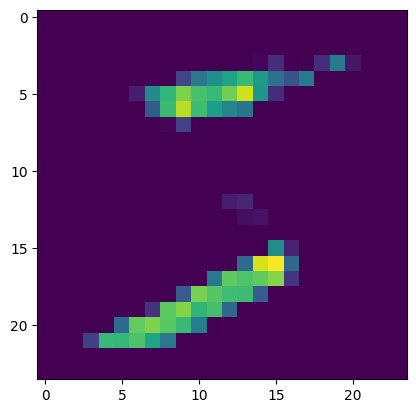

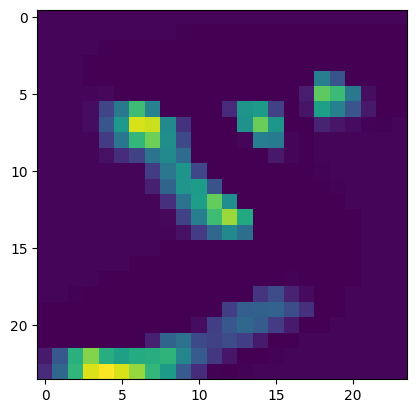

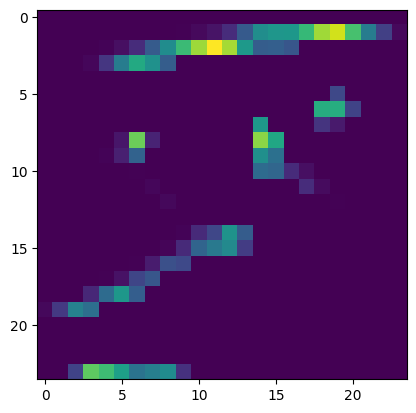

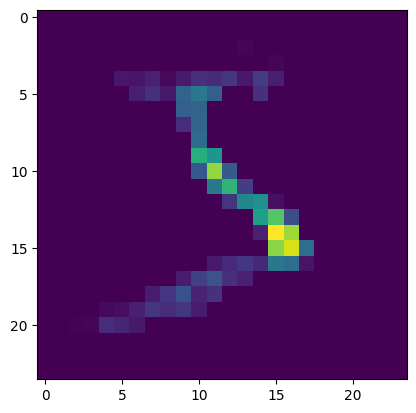

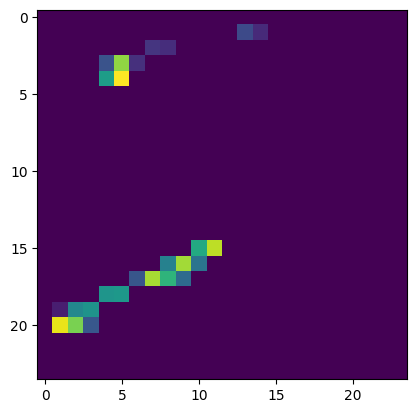

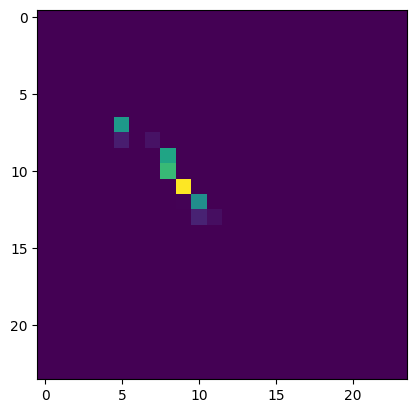

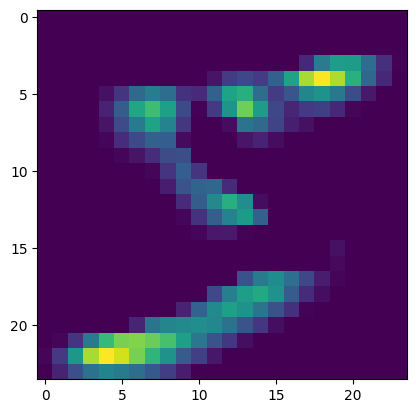

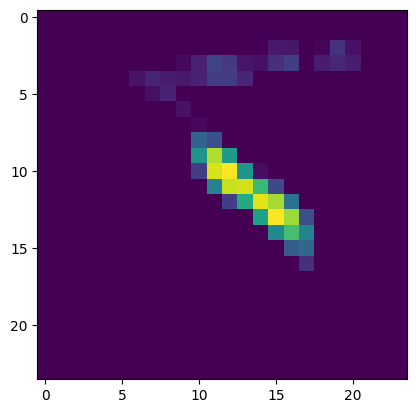

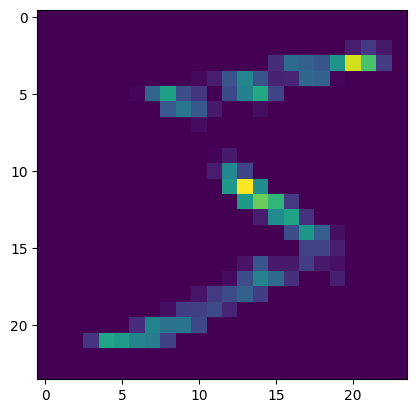

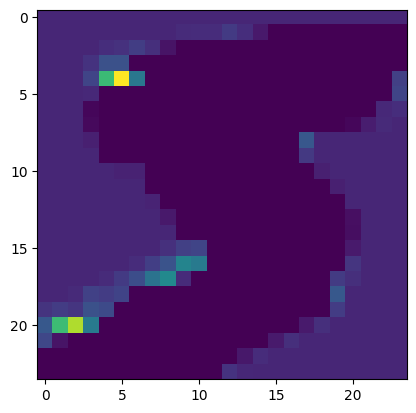

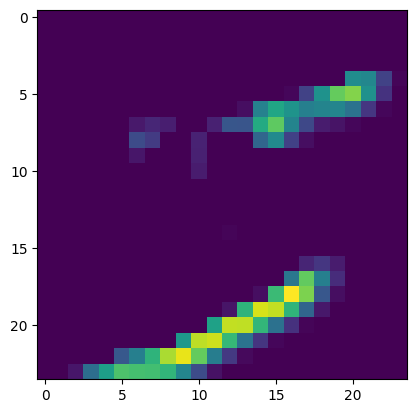

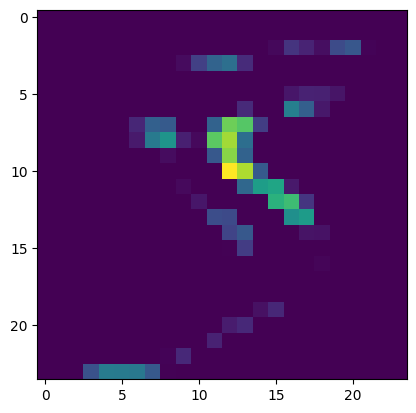

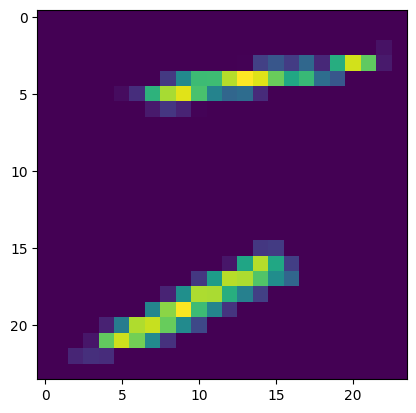

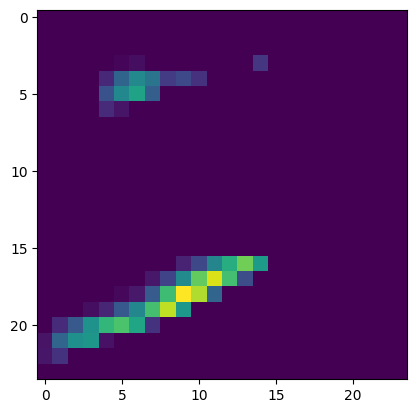

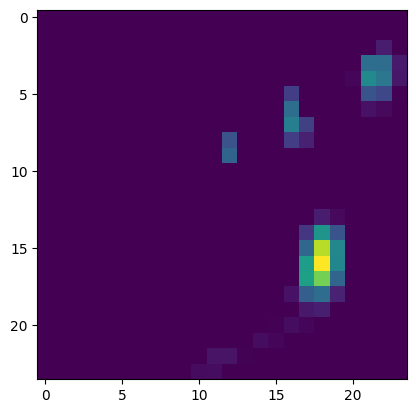

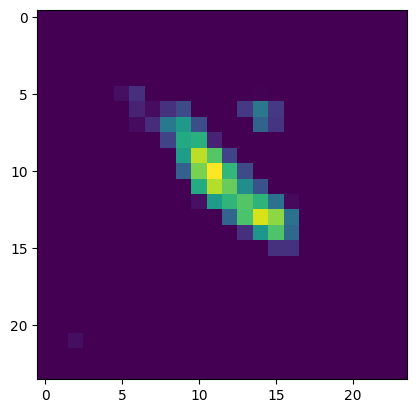

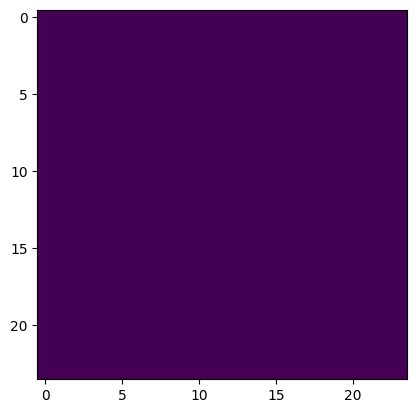

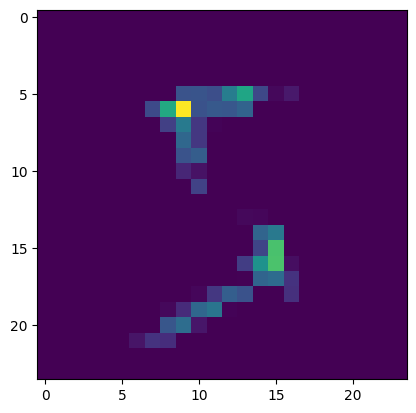

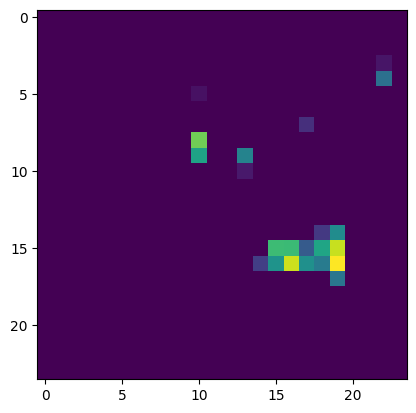

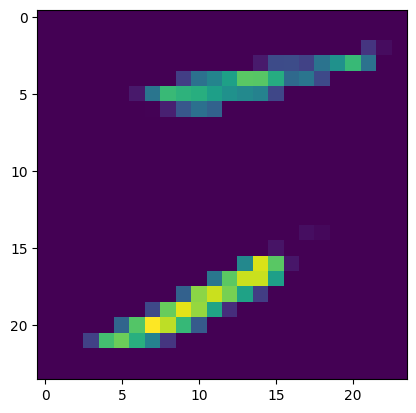

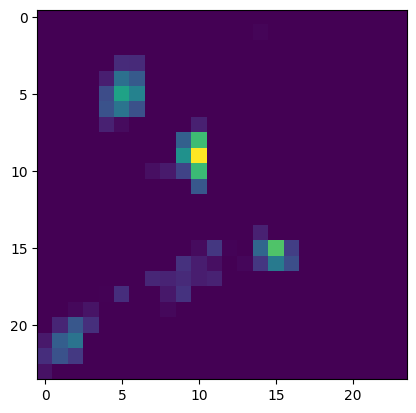

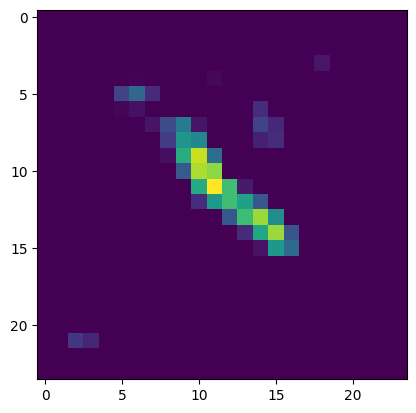

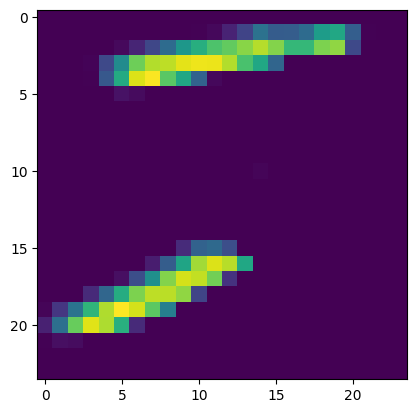

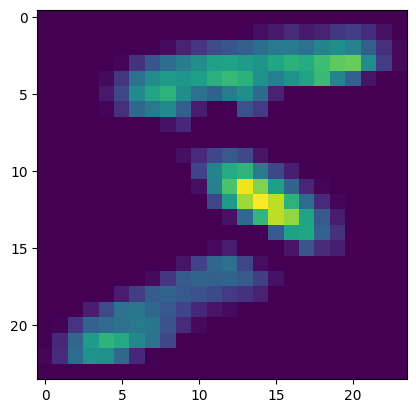

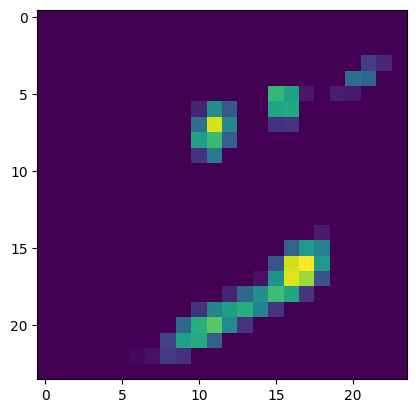

In [45]:
# outputs of second layer filters
tr_img = layers[0](x_train[0:1])
tr_img = layers[1](tr_img) # ReLU
tr_img = layers[2](tr_img)
tr_img = layers[3](tr_img) # ReLU
tr_img = tr_img.detach().cpu().numpy()
for ch in range(32):
  plt.figure()
  plt.imshow(tr_img[0,ch,:,:])

# Pooling

In [46]:
net = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Dropout(0.25),
    nn.Linear(12*12*32, 128),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(128, 10),
  )
fit(net)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,640
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
           Flatten-6                 [-1, 4608]               0
           Dropout-7                 [-1, 4608]               0
            Linear-8                  [-1, 128]         589,952
              ReLU-9                  [-1, 128]               0
          Dropout-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 596,042
Trainable params: 596,042
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9702999591827393


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9791999459266663


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9804999828338623


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9812999963760376


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9827999472618103


In [47]:
net = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Dropout(0.25),
    nn.Linear(5*5*32, 128),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(128, 10),
  )
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,640
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
            Conv2d-6           [-1, 32, 10, 10]           9,248
              ReLU-7           [-1, 32, 10, 10]               0
         MaxPool2d-8             [-1, 32, 5, 5]               0
           Flatten-9                  [-1, 800]               0
          Dropout-10                  [-1, 800]               0
           Linear-11                  [-1, 128]         102,528
             ReLU-12                  [-1, 128]               0
          Dropout-13                  [-1, 128]               0
           Linear-14                   

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9690999984741211


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9790999889373779


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9793999791145325


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9839999675750732


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9858999848365784


# Scheduling / checkpointing

In [48]:
# TODO

# General API

In [49]:
class Net11(nn.Module):
    def __init__(self):
        super().__init__()
        # create layers
        self.fl = nn.Flatten()
        self.ll1 = nn.Linear(28*28, 128)
        self.ll2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fl(x)
        x = self.ll1(x)
        # below: can use a ReLU layer or functional.relu function
        x = nn.functional.relu(x)
        x = self.ll2(x)
        return x

net = Net11()
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
            Linear-3                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9350999593734741


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9517999887466431


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.964199960231781


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9691999554634094


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9714999794960022


In [50]:
# flexibility!!!

class Net11a(nn.Module):
    def __init__(self):
        super().__init__()
        # create layers
        self.fl = nn.Flatten()
        self.ll1 = nn.Linear(28*28, 128)
        self.ll2 = nn.Linear(128, 10)
        self.ll3 = nn.Linear(128, 128)  # just for test

    def forward(self, x):
        x = self.fl(x)
        x = self.ll1(x)
        x = nn.functional.relu(x)
        # arbitrary operations
        x = 3*x + torch.sqrt(x.sin())
        # repeated application of the same layer
        for i in range(3):
            x = self.ll3(x)
            x = nn.functional.relu(x)
        x = self.ll2(x)
        return x

net = Net11a()
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
            Linear-3                  [-1, 128]          16,512
            Linear-4                  [-1, 128]          16,512
            Linear-5                  [-1, 128]          16,512
            Linear-6                   [-1, 10]           1,290
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.58
Estimated Total Size (MB): 0.59
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.09799999743700027


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.09799999743700027


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.09799999743700027


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.09799999743700027


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.09799999743700027


In [51]:
# make life easier
import torch.nn.functional as F

In [52]:
# side by side conv layers
class Net12(nn.Module):
    def __init__(self):
        super().__init__()
        # create layers
        self.c1 = nn.Conv2d(1, 8, kernel_size=5)
        self.c2 = nn.Conv2d(1, 32, kernel_size=3)
        self.fl1 = nn.Flatten()
        self.fl2 = nn.Flatten()
        self.ll1 = nn.Linear(24*24*8 + 26*26*32, 128)
        self.ll2 = nn.Linear(128, 10)

    def forward(self, x):
        x1 = self.c1(x)
        x1 = F.relu(x1)
        x1 = self.fl1(x1)
        x2 = self.c2(x)
        x2 = F.relu(x2)
        x2 = self.fl2(x2)
        x = torch.cat([x1, x2], 1) # along dimension 1!  dim 0 is # record in batch
        x = self.ll1(x)
        x = F.relu(x)
        x = self.ll2(x)
        return x

net = Net12()
fit(net)

# Keras for comparison
# input = keras.layers.Input(shape=(28,28,1))
#c1 = Conv2D(32, (3, 3), activation='relu')(input)
#f1 = Flatten()(c1)
#c2 = Conv2D(8, (5, 5), activation='relu')(input)
#f2 = Flatten()(c2)
#x = keras.layers.Concatenate()([f1, f2])
#output = Dense(units=10, activation='softmax')(x)
#model14 = keras.models.Model(inputs=input, outputs=output)
#compile_and_run(model14)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
           Flatten-2                 [-1, 4608]               0
            Conv2d-3           [-1, 32, 26, 26]             320
           Flatten-4                [-1, 21632]               0
            Linear-5                  [-1, 128]       3,358,848
            Linear-6                   [-1, 10]           1,290
Total params: 3,360,666
Trainable params: 3,360,666
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.40
Params size (MB): 12.82
Estimated Total Size (MB): 13.22
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.974399983882904


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9822999835014343


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9805999994277954


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9820999503135681


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9847999811172485


# Submodules

In [53]:
class VisionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # create layers
        self.c1 = nn.Conv2d(1, 32, kernel_size=3)
        self.c2 = nn.Conv2d(32, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.fl = nn.Flatten()
    def forward(self, x):
        x = self.c1(x)
        x = F.relu(x)
        x = self.c2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.fl(x)
        return x

In [54]:
class ComparDigits(nn.Module):
   def __init__(self):
        super().__init__()
        self.vm = VisionModel()
        self.ll1 = nn.Linear(32*12*12+32*12*12, 1)
   def forward(self, digit1, digit2):
        x1 = self.vm(digit1)  # shared weights: same submodule applied to different inputs
        x2 = self.vm(digit2)
        x = torch.cat([x1, x2], 1)
        x = self.ll1(x)
        return x

In [55]:
# special training loop
def fit_pairs(net, X_train=x_train, y_train=y_train, X_valid=x_test,
        y_valid=y_test, epochs=5, batch_size=128):
  if torch.cuda.is_available():
    device = "cuda"
  else:
    device = "cpu"
  net = net.to(device)
  X_train = X_train.to(device)
  y_train = y_train.to(device)
  if X_valid is not None:
    X_valid = X_valid.to(device)
    y_valid = y_valid.to(device)
  # note: wrong number of params:
  summary(net, [(1, 28, 28), (1, 28, 28)], device=device)

  optimizer = optim.Adam(net.parameters())
  epochs = epochs
  batch_size = batch_size
  # single output: use a different loss:
  loss = torch.nn.BCEWithLogitsLoss()  # includes sigmoid activation
  N = X_train.shape[0]
  for e in range(epochs):
      idx = torch.randperm(X_train.shape[0])
      X_train2 = X_train[idx]
      y_train2 = y_train[idx]

      i = 0
      # split into mini batches
      # torch.utils.data.DataLoader does this automatically
      pbar = tqdm.notebook.tqdm(total=(N+batch_size-1)//batch_size)
      while i < N:
          optimizer.zero_grad()
          j = min(N, i + batch_size)
          X_batch1 = X_train[i:j]
          X_batch2 = X_train2[i:j]
          y_batch = 1*(y_train[i:j] == y_train2[i:j])
          i = j
          pred = net(X_batch1, X_batch2)
          # Reshape y_batch to have the same number of dimensions as pred
          # using unsqueeze to add a dimension of size 1
          l = loss(pred, y_batch.unsqueeze(1).float())
          l.backward()
          optimizer.step()
          pbar.update(1)
      pbar.close()
      if X_valid is not None:
        with torch.no_grad():
          idx_v = torch.randperm(X_valid.shape[0])
          X_valid2 = X_valid[idx_v]
          y_valid2 = y_valid[idx_v]
          pred = net(X_valid, X_valid2)
          predicted = (pred > 0)
          val_acc = (1.0*(predicted==(y_valid==y_valid2))).mean().item()
          print("epoch", e, "val accur", val_acc)

In [56]:
cd_net = ComparDigits()
fit_pairs(cd_net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 32, 24, 24]           9,248
         MaxPool2d-3           [-1, 32, 12, 12]               0
           Flatten-4                 [-1, 4608]               0
       VisionModel-5                 [-1, 4608]               0
            Conv2d-6           [-1, 32, 26, 26]             320
            Conv2d-7           [-1, 32, 24, 24]           9,248
         MaxPool2d-8           [-1, 32, 12, 12]               0
           Flatten-9                 [-1, 4608]               0
      VisionModel-10                 [-1, 4608]               0
           Linear-11                    [-1, 1]           9,217
Total params: 28,353
Trainable params: 28,353
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.34
Forward/ba

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9024999737739563


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9013000130653381


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.8945000171661377


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.8995999693870544


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.8984999656677246


In [57]:
list((p[0], np.prod(p[1].shape)) for p in cd_net.named_parameters())

[('vm.c1.weight', 288),
 ('vm.c1.bias', 32),
 ('vm.c2.weight', 9216),
 ('vm.c2.bias', 32),
 ('ll1.weight', 9216),
 ('ll1.bias', 1)]

In [58]:
del cd_net

# Residual block

In [59]:
class Net13(nn.Module):
    def __init__(self):
        super().__init__()
        # keep original resolution
        self.c1 = nn.Conv2d(1, 32, kernel_size=3, padding="same")
        self.c2 = nn.Conv2d(32, 32, kernel_size=3, padding="same")
        self.fl = nn.Flatten()
        self.ll1 = nn.Linear(28*28*32, 10)

    def forward(self, x):
        c = self.c1(x)
        c = F.relu(c)
        c = self.c2(c)
        x = x + c   # residual connection
        x = F.relu(x)
        x = self.fl(x)
        x = self.ll1(x)
        return x

net = Net13()
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 32, 28, 28]           9,248
           Flatten-3                [-1, 25088]               0
            Linear-4                   [-1, 10]         250,890
Total params: 260,458
Trainable params: 260,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.57
Params size (MB): 0.99
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9751999974250793


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9818999767303467


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9829999804496765


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9840999841690063


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9840999841690063


In [60]:
class Net14(nn.Module):
    def __init__(self, n_blocks=20, residual=True):
        super().__init__()
        self.n_blocks = n_blocks
        self.residual = residual
        for i in range(n_blocks):
            in_c = 1 if i == 0 else 32
            # add_module method easier here that adding attributes by hand
            self.add_module(f"c1{i}", nn.Conv2d(in_c, 32, kernel_size=3, padding="same"))
            self.add_module(f"c2{i}", nn.Conv2d(32, 32, kernel_size=3, padding="same"))
        self.fl = nn.Flatten()
        self.ll1 = nn.Linear(28*28*32, 10)

    def forward(self, x):
      for i in range(self.n_blocks):
        c = getattr(self, f"c1{i}")(x)
        c = F.relu(c)
        c = getattr(self, f"c2{i}")(c)
        if self.residual:
          c = c + x
        x = F.relu(c)
      x = self.fl(x)
      x = self.ll1(x)
      return x

net = Net14(20, True)
fit(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 32, 28, 28]           9,248
            Conv2d-3           [-1, 32, 28, 28]           9,248
            Conv2d-4           [-1, 32, 28, 28]           9,248
            Conv2d-5           [-1, 32, 28, 28]           9,248
            Conv2d-6           [-1, 32, 28, 28]           9,248
            Conv2d-7           [-1, 32, 28, 28]           9,248
            Conv2d-8           [-1, 32, 28, 28]           9,248
            Conv2d-9           [-1, 32, 28, 28]           9,248
           Conv2d-10           [-1, 32, 28, 28]           9,248
           Conv2d-11           [-1, 32, 28, 28]           9,248
           Conv2d-12           [-1, 32, 28, 28]           9,248
           Conv2d-13           [-1, 32, 28, 28]           9,248
           Conv2d-14           [-1, 32,

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9811999797821045


  0%|          | 0/469 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
net = Net14(20, False)
fit(net)

In [ ]:
# use submodules
class ResBlock(nn.Module):
    def __init__(self, first=False):
        super().__init__()
        in_c = 1 if first else 32
        self.c1 = nn.Conv2d(in_c, 32, kernel_size=3, padding="same")
        self.c2 = nn.Conv2d(32, 32, kernel_size=3, padding="same")
    def forward(self, x):
      c = self.c1(x)
      c = F.relu(c)
      c = self.c2(c)
      c = c + x
      x = F.relu(c)
      return x

layers = [ResBlock(True)]
for i in range(5):
  layers.append(ResBlock())
layers.append(nn.Flatten())
layers.append(nn.Linear(28*28*32, 10))

net = nn.Sequential(*layers)
fit(net)

# image augmentation

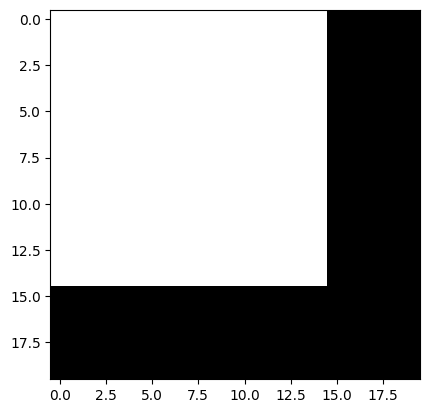

In [61]:
img = np.zeros((3,20,20))
img[:,0:15,0:15]=1
plt.imshow(img.transpose(1,2,0))

In [62]:
from torchvision.transforms import v2

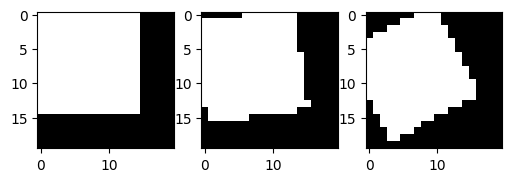

In [63]:
fig, ax = plt.subplots(1,3, figsize=(6,2))
ax[0].imshow(img.transpose(1,2,0))
ax[1].imshow(v2.RandomRotation(45)(torch.tensor(img)).numpy().transpose(1,2,0))
ax[2].imshow(v2.RandomRotation(45)(torch.tensor(img)).numpy().transpose(1,2,0))

RandomCrop(size=(10, 10), padding=[10, 10, 10, 10], pad_if_needed=False, fill=0, padding_mode=constant)
RandomHorizontalFlip(p=0.5)
RandomAffine(degrees=[-25.0, 25.0], translate=(0.3, 0.3), interpolation=InterpolationMode.NEAREST, fill=0)
GaussianBlur(kernel_size=(3, 3), sigma=[0.1, 2.0])
GaussianNoise(mean=0.0, sigma=0.1, clip=True)


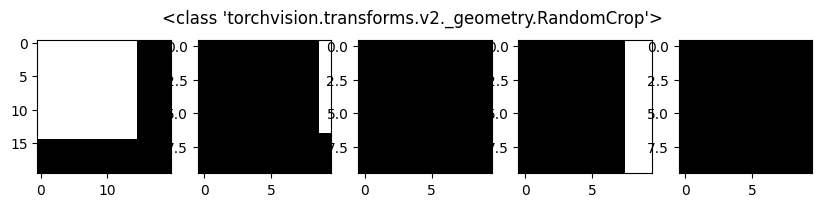

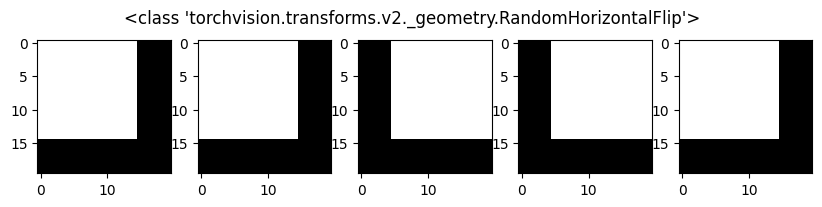

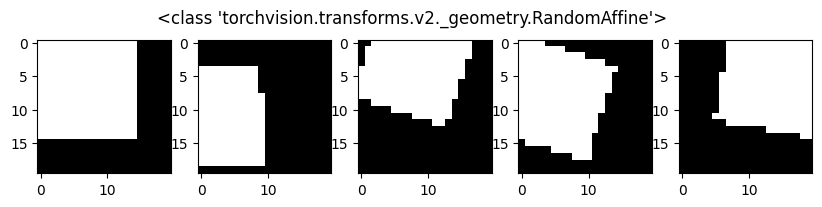

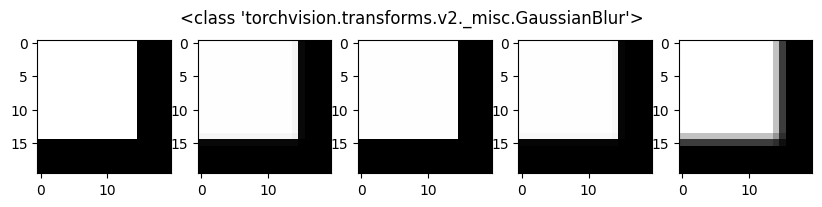

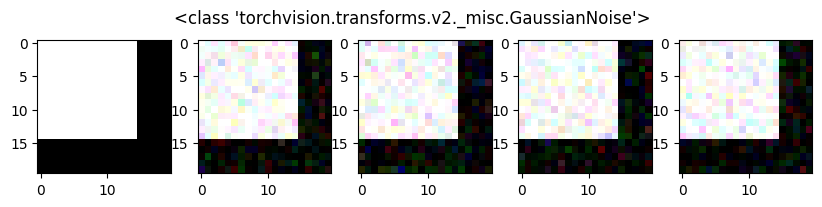

In [64]:
for l in [v2.RandomCrop(10,10),
          v2.RandomHorizontalFlip(),
          #v2.RandomVerticalFlip(),
          v2.RandomAffine(25, translate=(0.3,0.3)),
          v2.GaussianBlur(3),
          v2.GaussianNoise(),]:
  fig, ax = plt.subplots(1,5, figsize=(10,2))
  fig.suptitle(str(l.__class__))
  ax[0].imshow(img.transpose(1,2,0))
  for i in range(4):
    ax[i+1].imshow(l(torch.tensor(img)).numpy().transpose(1,2,0))
  print(l)

In [74]:
class Net16(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 32, kernel_size=3, padding="same")
        self.c2 = nn.Conv2d(32, 32, kernel_size=3, padding="same")
        self.fl = nn.Flatten()
        self.ll1 = nn.Linear(28*28*32, 10)

    def forward(self, x):
        if self.training:
          x = v2.RandomAffine(3, translate=(0.05,0.05))(x)
        c = self.c1(x)
        c = F.relu(c)
        c = self.c2(c)
        x = x + c
        x = F.relu(x)
        x = self.fl(x)
        x = self.ll1(x)
        return x

net = Net16()
fit(net, epochs=20)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 32, 28, 28]           9,248
           Flatten-3                [-1, 25088]               0
            Linear-4                   [-1, 10]         250,890
Total params: 260,458
Trainable params: 260,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.57
Params size (MB): 0.99
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.9764999747276306


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.981499969959259


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9842999577522278


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9843999743461609


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.9870999455451965


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 val accur 0.9868999719619751


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6 val accur 0.9890999794006348


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7 val accur 0.9891999959945679


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8 val accur 0.988599956035614


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9 val accur 0.9872999787330627


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10 val accur 0.989799976348877


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11 val accur 0.9910999536514282


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12 val accur 0.9914000034332275


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13 val accur 0.9918999671936035


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14 val accur 0.9914000034332275


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15 val accur 0.9914000034332275


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16 val accur 0.9910999536514282


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17 val accur 0.9911999702453613


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18 val accur 0.9906999468803406


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19 val accur 0.9909999966621399


In [70]:
net.eval()
net.train()
net.training

True

# Final test on EMNIST

In [75]:
# refit a good network
net = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(32, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Dropout(0.25),
    nn.Linear(5*5*32, 128),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Linear(128, 10),
  )
fit(net, epochs=20)
net.eval()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           9,248
              ReLU-4           [-1, 32, 24, 24]               0
         MaxPool2d-5           [-1, 32, 12, 12]               0
            Conv2d-6           [-1, 32, 10, 10]           9,248
              ReLU-7           [-1, 32, 10, 10]               0
         MaxPool2d-8             [-1, 32, 5, 5]               0
           Flatten-9                  [-1, 800]               0
          Dropout-10                  [-1, 800]               0
           Linear-11                  [-1, 128]         102,528
             ReLU-12                  [-1, 128]               0
          Dropout-13                  [-1, 128]               0
           Linear-14                   

  0%|          | 0/469 [00:00<?, ?it/s]

epoch 0 val accur 0.98089998960495


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 1 val accur 0.9858999848365784


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 2 val accur 0.9892999529838562


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 3 val accur 0.9907999634742737


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 4 val accur 0.991599977016449


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 5 val accur 0.9916999936103821


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 6 val accur 0.9922999739646912


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 7 val accur 0.9922999739646912


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 8 val accur 0.9928999543190002


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 9 val accur 0.9932999610900879


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 10 val accur 0.9929999709129333


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 11 val accur 0.9941999912261963


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 12 val accur 0.9928999543190002


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 13 val accur 0.9929999709129333


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 14 val accur 0.9935999512672424


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 15 val accur 0.9928999543190002


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 16 val accur 0.9940999746322632


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 17 val accur 0.9939000010490417


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 18 val accur 0.9932999610900879


  0%|          | 0/469 [00:00<?, ?it/s]

epoch 19 val accur 0.9932000041007996


Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Dropout(p=0.25, inplace=False)
  (10): Linear(in_features=800, out_features=128, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.25, inplace=False)
  (13): Linear(in_features=128, out_features=10, bias=True)
)

In [76]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip

--2024-11-28 09:00:20--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
Resolving biometrics.nist.gov (biometrics.nist.gov)... 18.235.227.114
Connecting to biometrics.nist.gov (biometrics.nist.gov)|18.235.227.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  14.9MB/s    in 36s     

2024-11-28 09:00:57 (14.7 MB/s) - ‘gzip.zip’ saved [561753746/561753746]



In [77]:
from zipfile import ZipFile
import gzip
from pprint import pprint

with ZipFile("gzip.zip", "r") as zip_f:
    pprint(zip_f.infolist())
    with zip_f.open("gzip/emnist-digits-train-images-idx3-ubyte.gz") as f_gz:
        with gzip.open(f_gz) as f:
            meta = f.read(16) # skip metadata
            ex = np.frombuffer(f.read(), dtype=np.uint8)
    with zip_f.open('gzip/emnist-digits-train-labels-idx1-ubyte.gz') as f_gz:
        with gzip.open(f_gz) as f:
            meta = f.read(8) # skip metadata
            y = np.frombuffer(f.read(), dtype=np.uint8)

[<ZipInfo filename='gzip/emnist-balanced-mapping.txt' compress_type=deflate external_attr=0x20 file_size=328 compress_size=169>,
 <ZipInfo filename='gzip/emnist-balanced-test-images-idx3-ubyte.gz' compress_type=deflate external_attr=0x20 file_size=4714707 compress_size=4716147>,
 <ZipInfo filename='gzip/emnist-balanced-test-labels-idx1-ubyte.gz' external_attr=0x20 file_size=13504>,
 <ZipInfo filename='gzip/emnist-balanced-train-images-idx3-ubyte.gz' compress_type=deflate external_attr=0x20 file_size=28207740 compress_size=28216340>,
 <ZipInfo filename='gzip/emnist-balanced-train-labels-idx1-ubyte.gz' compress_type=deflate external_attr=0x20 file_size=80618 compress_size=80643>,
 <ZipInfo filename='gzip/emnist-byclass-mapping.txt' compress_type=deflate external_attr=0x20 file_size=447 compress_size=216>,
 <ZipInfo filename='gzip/emnist-byclass-test-images-idx3-ubyte.gz' compress_type=deflate external_attr=0x20 file_size=28908322 compress_size=28917137>,
 <ZipInfo filename='gzip/emnist-b

In [78]:
ex = ex.reshape(-1,1,28,28).swapaxes(2,3)  # transpose needed!!!
ex = ex.astype(np.float32) / 255
ex.max()

1.0

[8 9 6 3 6 6 7 1 9 0 9 6 8 4 8 3 3 7 0 9 5 1 1 8 1 9 9 1 4 7 0 1 4 4 4 5]


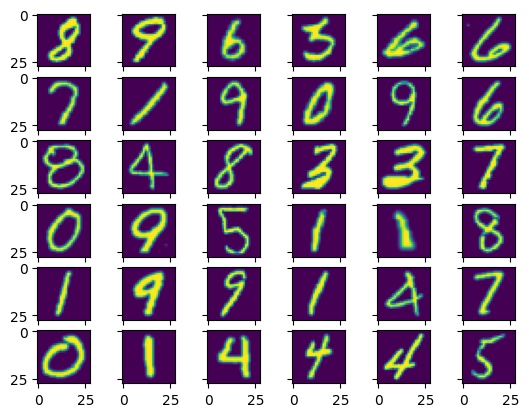

In [79]:
_, ax = plt.subplots(6, 6, sharex=True, sharey=True, squeeze=True)
for i, a in enumerate(ax.ravel()):
    a.imshow(ex[i,0,:,:])
print(y[:len(ax.ravel())])

In [80]:
print(ex.shape)

(240000, 1, 28, 28)


In [83]:
net.to("cuda")
x = torch.tensor(ex)
x = x.to("cuda")
yy = net(x)

OutOfMemoryError: CUDA out of memory. Tried to allocate 19.34 GiB. GPU 0 has a total capacity of 14.75 GiB of which 12.70 GiB is free. Process 6472 has 2.05 GiB memory in use. Of the allocated memory 1.64 GiB is allocated by PyTorch, and 274.58 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [85]:
i = 0
N = ex.shape[0]
pred = []
net.eval()
with torch.no_grad():
  while i < N:
    x = torch.tensor(ex[i:min(N,i+128)])
    if torch.cuda.is_available():
      # move only small arrays to save GPU mem
      x = x.to("cuda")
    yy = net(x)
    p = yy.argmax(axis=1).cpu().numpy()
    del x # free GPU mem
    del yy # free GPU mem
    pred.extend(p)
    i += 128
print(pred)
print(list(y))
accur = np.mean(pred == y)
print(accur)

[8, 8, 6, 3, 6, 6, 2, 1, 9, 0, 4, 6, 8, 4, 8, 3, 3, 7, 0, 4, 5, 1, 1, 8, 1, 4, 7, 1, 2, 7, 0, 1, 4, 4, 4, 5, 9, 2, 0, 2, 6, 4, 1, 2, 8, 8, 8, 8, 0, 2, 9, 1, 9, 0, 1, 7, 1, 0, 6, 4, 8, 2, 4, 8, 9, 4, 8, 5, 8, 5, 8, 5, 4, 3, 5, 2, 0, 2, 2, 8, 7, 4, 7, 0, 8, 2, 5, 3, 4, 8, 7, 3, 7, 2, 4, 5, 6, 1, 0, 8, 5, 0, 4, 2, 8, 1, 2, 7, 8, 4, 4, 5, 2, 8, 4, 0, 1, 1, 4, 2, 8, 7, 5, 0, 0, 4, 3, 2, 4, 1, 3, 3, 0, 4, 6, 8, 5, 8, 7, 2, 0, 2, 4, 6, 2, 1, 7, 5, 7, 0, 1, 2, 0, 5, 3, 0, 0, 4, 7, 7, 8, 3, 5, 1, 9, 3, 6, 6, 7, 0, 8, 1, 2, 6, 3, 5, 3, 4, 8, 4, 1, 0, 1, 6, 9, 7, 9, 0, 1, 2, 4, 2, 3, 7, 4, 3, 4, 9, 5, 5, 3, 0, 0, 1, 4, 8, 4, 1, 3, 7, 8, 1, 7, 7, 0, 1, 9, 7, 0, 2, 4, 2, 8, 9, 5, 5, 4, 5, 1, 8, 6, 2, 4, 3, 5, 9, 5, 1, 6, 4, 7, 2, 3, 4, 8, 7, 7, 0, 8, 4, 0, 1, 8, 3, 7, 6, 5, 9, 6, 6, 4, 1, 6, 9, 4, 7, 7, 9, 0, 4, 5, 3, 0, 7, 9, 7, 3, 4, 6, 0, 8, 4, 0, 1, 5, 9, 8, 3, 5, 6, 0, 8, 5, 1, 0, 4, 1, 8, 4, 0, 8, 1, 8, 1, 1, 4, 4, 8, 3, 0, 0, 4, 6, 2, 5, 0, 5, 5, 1, 8, 8, 1, 1, 3, 7, 4, 8, 5, 4, 3, 5, 2, 6, 

In [86]:
torch.cuda.empty_cache()
#del p

### Pre-trained networks

In [87]:
import torchvision as tv

In [88]:
tv.models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [89]:
vw = tv.models.get_model_weights('vgg16')
vw

<enum 'VGG16_Weights'>

In [90]:
for w in vw:
  print(w)
# weights differ with input transforms

VGG16_Weights.IMAGENET1K_V1
VGG16_Weights.IMAGENET1K_FEATURES


In [91]:
vw.DEFAULT

VGG16_Weights.IMAGENET1K_V1

In [92]:
vgg16 = tv.models.vgg16(weights="IMAGENET1K_V1")

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 95.3MB/s]


In [93]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [94]:
vgg16.to("cuda")

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [95]:
preproc = vw.DEFAULT.transforms()

In [124]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg"
img_path = 'test.jpg'

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import urllib

In [98]:
from torchvision.io import decode_image

torch.Size([3, 3888, 2592])
torch.uint8


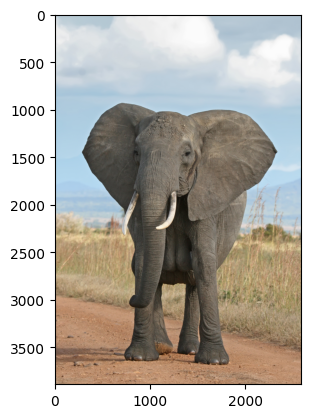

In [125]:
urllib.request.urlretrieve(img_url, img_path)
img = decode_image(img_path)
print(img.shape)
print(img.dtype)
plt.imshow(img.permute((1,2,0))/255)

In [126]:
x = preproc(img)

torch.Size([3, 224, 224])
torch.float32


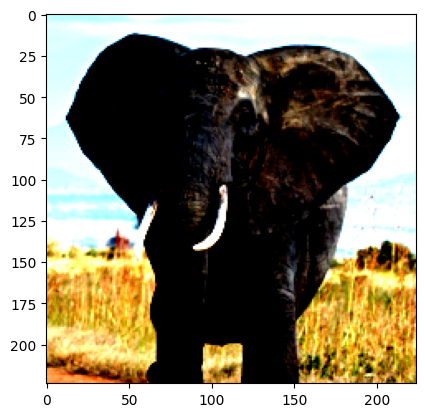

In [101]:
print(x.shape)
print(x.dtype)
plt.imshow(x.permute((1,2,0)))

In [117]:
vgg16.training
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [127]:
preds = vgg16(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
print(preds)

[[1.49663282e-09 2.20551116e-12 5.97480398e-11 3.72144919e-11
  3.04995577e-11 8.33734415e-10 1.09924708e-10 7.06713577e-11
  3.91368916e-11 6.43844866e-10 2.93893490e-13 6.71316301e-13
  1.49379597e-12 9.13534439e-13 3.30949439e-12 1.01694076e-12
  2.58374702e-12 1.73334663e-11 5.75711137e-12 4.44785962e-12
  2.12291452e-11 4.63080463e-09 2.18872559e-10 1.72273884e-09
  6.03206041e-10 7.10578861e-12 4.21803001e-12 3.17451295e-12
  1.11997625e-11 3.00713360e-12 1.76986420e-12 1.94687300e-12
  4.02849574e-13 1.15454167e-10 1.49310575e-09 7.63903885e-10
  1.70048076e-09 4.77293538e-10 3.86466414e-11 8.50227000e-10
  1.60220639e-11 5.64337899e-12 1.47233545e-11 8.11349543e-10
  5.05279325e-11 4.67211617e-11 4.19996121e-11 4.78057038e-10
  8.34070413e-09 3.25594607e-10 1.75818504e-09 6.78440256e-06
  1.61371125e-10 5.76894157e-11 6.22416729e-10 1.61305580e-10
  2.64582605e-12 1.71520166e-12 6.32752795e-10 1.93875107e-11
  1.86379974e-11 1.12898206e-11 3.63308078e-10 5.18409593e-10
  5.1779

In [128]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt") as f:
    imagenet_classes = [l.strip() for l in f]
print(imagenet_classes)

--2024-11-28 09:50:51--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-11-28 09:50:52 (118 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfr

In [129]:
def decode_predictions(preds, top=5):
    top_preds = np.argsort(preds[0])[-top:]
    for i in reversed(top_preds):
        print(f"{imagenet_classes[i]}: {preds[0, i]:.2}")

In [130]:
decode_predictions(preds)

African elephant: 0.6
tusker: 0.39
Indian elephant: 0.0057
triceratops: 6.8e-06
trilobite: 2.9e-07


In [ ]:
# one more elephant

torch.Size([3, 330, 570])
torch.uint8


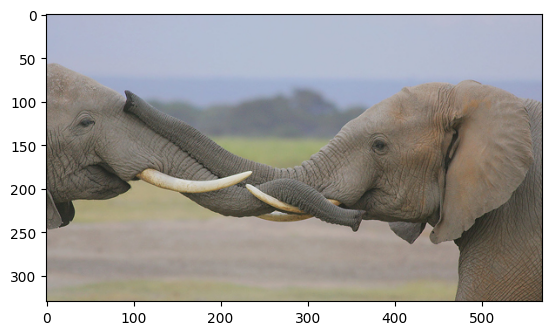

In [131]:
img_url="https://www.biologicaldiversity.org/assets/img/species/mammals/SavannahElephants_Flickr_SteveGarvie.jpg"
urllib.request.urlretrieve(img_url, img_path)
img = decode_image(img_path)
print(img.shape)
print(img.dtype)
plt.imshow(img.permute((1,2,0))/255)

In [132]:
x = preproc(img)
preds = vgg16(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
decode_predictions(preds)

African elephant: 0.62
tusker: 0.34
Indian elephant: 0.044
triceratops: 1.1e-05
water buffalo: 3.7e-07


In [133]:
# now a car

torch.Size([3, 1060, 2008])
torch.uint8


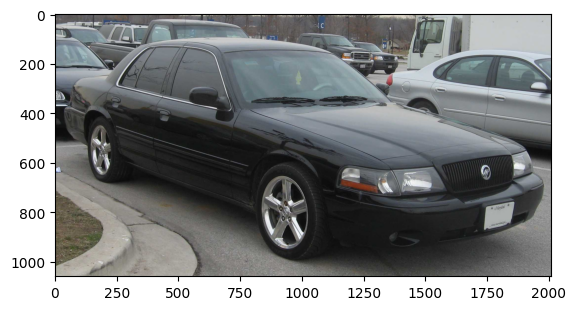

In [134]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/9/9c/Mercury_Marauder.jpg"
urllib.request.urlretrieve(img_url, img_path)
img = decode_image(img_path)
print(img.shape)
print(img.dtype)
plt.imshow(img.permute((1,2,0))/255)

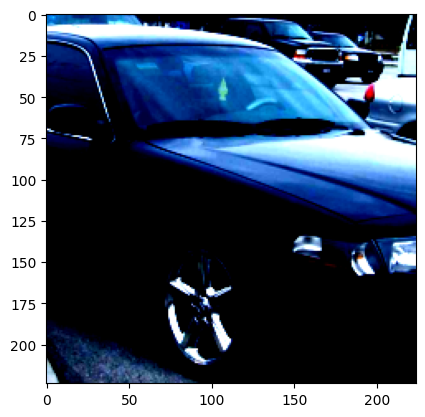

In [135]:
x = preproc(img)
plt.imshow(x.permute((1,2,0)))

In [136]:
preds = vgg16(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
decode_predictions(preds)

convertible: 0.31
beach wagon: 0.24
car wheel: 0.14
minivan: 0.079
limousine: 0.073


In [137]:
"passenger car" in imagenet_classes

True

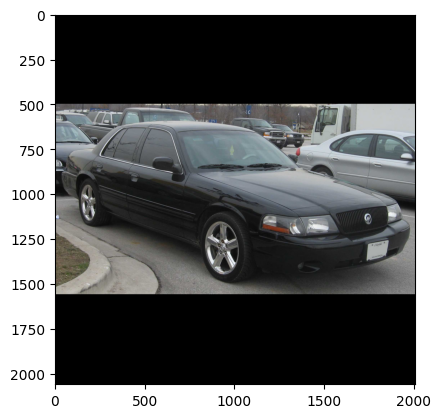

In [138]:
# maybe aspect ratio changed
img_pad = tv.transforms.Pad((0, 500))(img)
plt.imshow(img_pad.permute((1,2,0)))

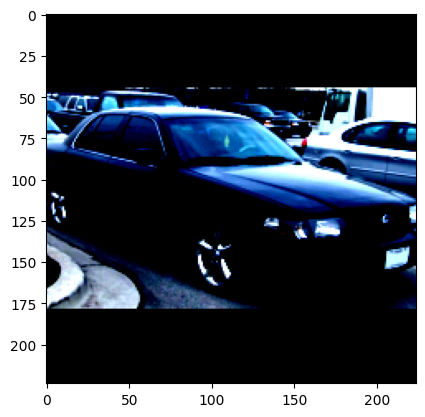

In [139]:
x = preproc(img_pad)
plt.imshow(x.permute((1,2,0)))

In [140]:
preds = vgg16(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
decode_predictions(preds)

beach wagon: 0.37
limousine: 0.16
car wheel: 0.13
grille: 0.093
convertible: 0.067


# ResNet50 model

In [141]:
vw = tv.models.get_model_weights('ResNet50')
for w in vw:
  print(w)
print(vw.DEFAULT)

ResNet50_Weights.IMAGENET1K_V1
ResNet50_Weights.IMAGENET1K_V2
ResNet50_Weights.IMAGENET1K_V2


In [142]:
resnet50 = tv.models.get_model("resnet50", weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 121MB/s]


In [143]:
preproc = vw.DEFAULT.transforms()

In [144]:
resnet50.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# resnet 50 source code
# https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py

In [147]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

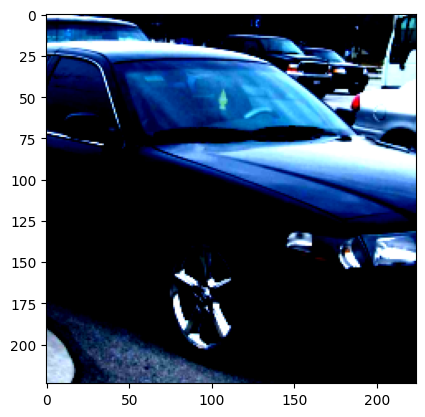

In [148]:
x = preproc(img)
plt.imshow(x.permute((1,2,0)))

In [149]:
preds = resnet50(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
decode_predictions(preds)

beach wagon: 0.096
limousine: 0.058
minivan: 0.05
car wheel: 0.041
grille: 0.029


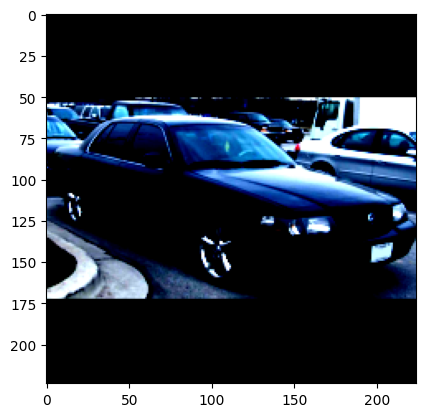

In [150]:
x = preproc(img_pad)
plt.imshow(x.permute((1,2,0)))

In [151]:
preds = resnet50(x.unsqueeze(0).to("cuda"))
preds = F.softmax(preds, dim=1)
preds = preds.cpu().detach().numpy()
decode_predictions(preds)

beach wagon: 0.18
limousine: 0.088
car wheel: 0.057
grille: 0.027
minivan: 0.018
